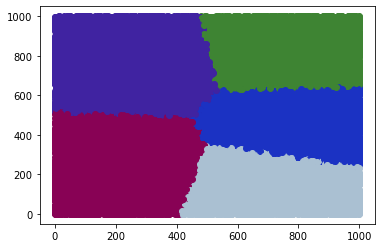

--- 25977.751570224762 seconds ---


In [43]:
# K means cluster for two dimensional space

import random
import math
import matplotlib.pyplot as plot
import numpy as np
import time



def k_means(k,iterations,n,highest_range):
    def create_data(highest,n):
        x,y =[],[]
        for i in range(n):
            x.append(random.randint(0,highest))
            y.append(random.randint(0,highest))
        return x,y

    k_points_x, k_points_y = create_data(highest_range,k)
    #Assign each centroid a cluster colour
    cluster_colors = []
    for i in range(k):
        cluster_colors.append(np.random.rand(1,3))


    def splot(data_x,data_y,assigments):
        for i in range(len(k_points_x)):
            plot.scatter(k_points_x[i],k_points_y[i],c='red')
        for i in range(len(assigments)):
                plot.scatter(data_x[i],data_y[i],c=cluster_colors[assignments[i]])
        plot.show()


    data_x,data_y = create_data(highest_range,n)
    assignments = []
    # plot.scatter(data_x, data_y)
    assignments = [] #each index correspond to a dp, each value of index correspond to that dp's assigned cluster

    #Start K Means Algorithm (Run time wise)
    start_time = time.time()

    for i in range(iterations):
        for dp in range(n):
            closest = 10000
            smallest_distance = 1000
            for centroid_i in range(k):
                distance = math.sqrt(sum([(data_x[dp]-k_points_x[centroid_i])**2,(data_y[dp]-k_points_y[centroid_i])**2]))
                if distance < smallest_distance:
                    closest = centroid_i
                    smallest_distance = distance
            if i == 0:#first iteration when no values initiated
                assignments.append(closest)
            else:
                assignments[dp] = closest
        #splot(data_x,data_y,assignments)# plot its closest centroids in this iteration
        #recalculation starts
        for centroid_i in range(k):
            x_total = 0
            y_total = 0
            counter = 0
            for dp in range(n):
                if assignments[dp] == centroid_i:
                    x_total += data_x[dp]
                    y_total += data_y[dp]
                    counter +=1
            k_points_x[centroid_i] = x_total/counter
            k_points_y[centroid_i] = y_total/counter
    splot(data_x,data_y,assignments)# plot its closest centroids in this iteration
    duration = time.time() - start_time
    print("--- %s seconds ---" % (duration))
    return duration

# The Main Function
k = 5
iterations = 5
highest_range = 1000 #range of the data space
n_list = [100000]
durations = []
for n in n_list:
    durations.append(k_means(k,iterations,n,highest_range))


In [44]:
durations #0.28368592262268066, 0.40253400802612305, 5.481091022491455, 231.18355202674866, 25977.751570224762

[25977.751570224762]

[6, 4]


In [ ]:
def k_means(data, k, number_of_iterations):
    n = len(data)
    number_of_features = data.shape[1]
    # Pick random indices for the initial centroids.
    initial_indices = np.random.choice(range(n), k)
    # We keep the centroids as |features| x k matrix.
    means = data[initial_indices].T
    # To avoid loops, we repeat the data k times depthwise and compute the
    # distance from each point to each centroid in one step in a
    # n x |features| x k tensor.
    repeated_data = np.stack([data] * k, axis=-1)
    all_rows = np.arange(n)
    zero = np.zeros([1, 1, 2])
    for _ in range(number_of_iterations):
        # Broadcast means across the repeated data matrix, gives us a
        # n x k matrix of distances.
        distances = np.sum(np.square(repeated_data - means), axis=1)
        # Find the index of the smallest distance (closest cluster) for each
        # point.
        assignment = np.argmin(distances, axis=-1)
        # Again to avoid a loop, we'll create a sparse matrix with k slots for
        # each point and fill exactly the one slot that the point was assigned
        # to. Then we reduce across all points to give us the sum of points for
        # each cluster.
        sparse = np.zeros([n, k, number_of_features])
        sparse[all_rows, assignment] = data
        # To compute the correct mean, we need to know how many points are
        # assigned to each cluster (without a loop).
        counts = (sparse != zero).sum(axis=0)
        # Compute new assignments.
        means = sparse.sum(axis=0).T / counts.clip(min=1).T
    return means.T
